<a href="https://colab.research.google.com/github/NipunSGeeTH/Digit-Recognizer-MNIST-dataset-ML/blob/main/digit_recognizerusing_the_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import
- TensorFlow: for building and training neural networks

- NumPy: for mathematical operations

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


# Load and Understand the Data

In [3]:
# Load MNIST dataset directly from Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training set:", x_train.shape)
print("Test set:", x_test.shape)


Training set: (60000, 28, 28)
Test set: (10000, 28, 28)


# Preprocessing (Normalization)
- Neural networks work best when inputs are in small ranges (like 0–1).
- It stabilizes gradients and speeds up training.

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0


# Visualize the Data

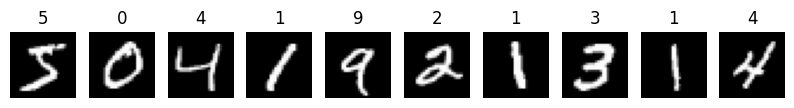

In [6]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()


# Build a Simple Neural Network

A neural network is built of layers of “neurons” (mathematical units) that transform inputs step by step.

Each layer:


z=W⋅x+b

a=activation(z)

Where:


W: weights (learned)


b: bias


activation: introduces non-linearity (ReLU, sigmoid, softmax)

In [7]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),     # Converts 28x28 → 784 vector
    layers.Dense(128, activation='relu'),     # Hidden layer: learns patterns
    layers.Dense(10, activation='softmax')    # Output: 10 digits, gives probabilities
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile the Model

- Optimizer: decides how weights change (Adam = adaptive gradient method)

- Loss: measures error between true and predicted output

- Metrics: tells how well model performs (accuracy)

In [8]:
model.compile(
    optimizer='adam',                        # Adaptive Gradient Optimizer
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']
)


# Train the Model

In [9]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8846 - loss: 0.4224 - val_accuracy: 0.9574 - val_loss: 0.1431
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9628 - loss: 0.1257 - val_accuracy: 0.9709 - val_loss: 0.0983
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9762 - loss: 0.0823 - val_accuracy: 0.9752 - val_loss: 0.0843
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9821 - loss: 0.0602 - val_accuracy: 0.9748 - val_loss: 0.0812
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9861 - loss: 0.0458 - val_accuracy: 0.9774 - val_loss: 0.0754


# Visualize Accuracy and Loss

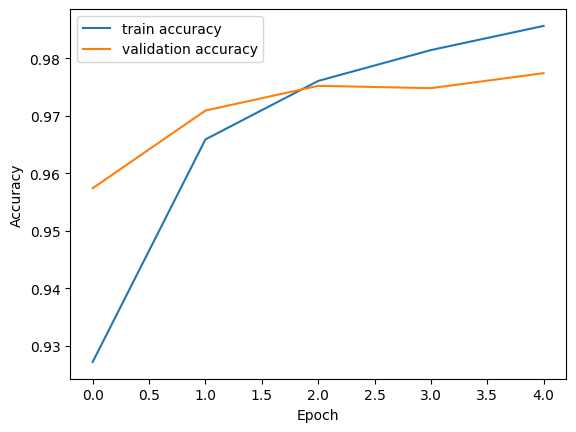

In [10]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Evaluate the Model

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 - 1s - 2ms/step - accuracy: 0.9774 - loss: 0.0754
Test Accuracy: 97.74%


# Make Predictions

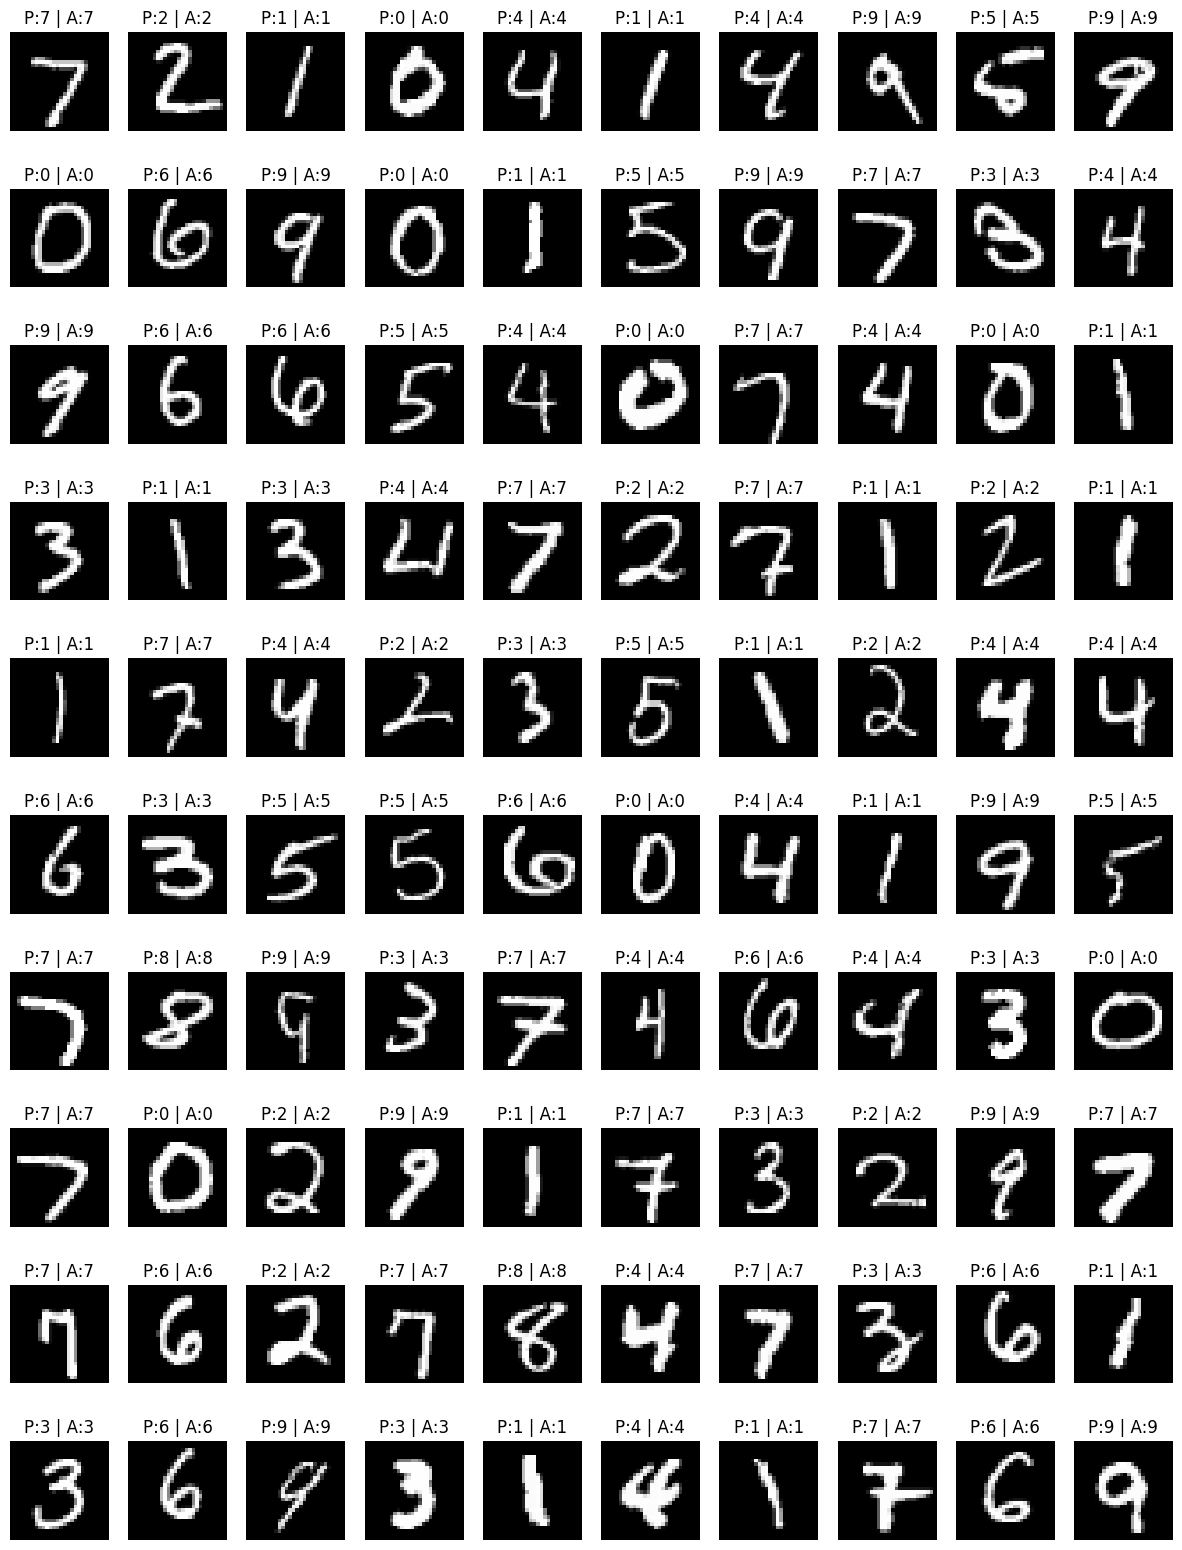

In [22]:
plt.figure(figsize=(15, 20))
for i in range(100):  # Show 25 test samples
    plt.subplot(10, 10, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"P:{np.argmax(predictions[i])} | A:{y_test[i]}")
    plt.axis('off')
plt.show()



Total wrong predictions: 226


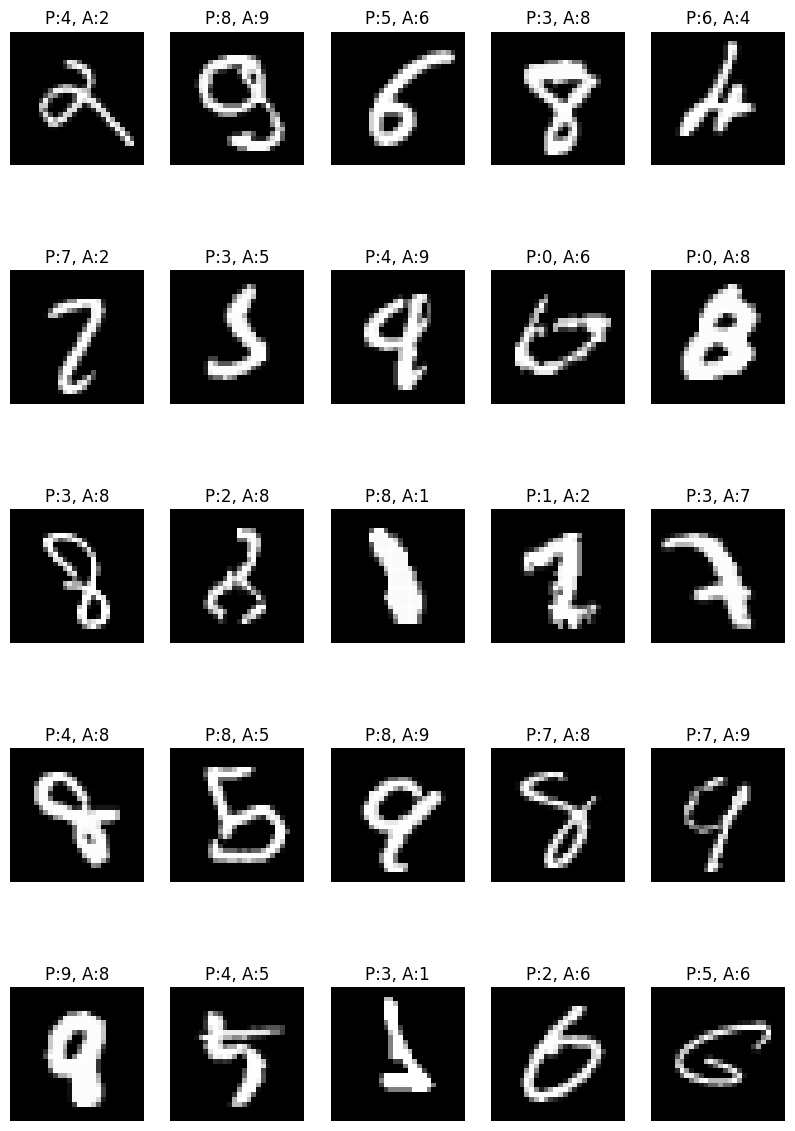

In [28]:
# Find indexes where prediction != actual
incorrect = np.where(pred_labels != y_test)[0]

print(f"Total wrong predictions: {len(incorrect)}")

# Show first 10 wrong predictions
plt.figure(figsize=(10, 15))
for i, idx in enumerate(incorrect[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"P:{pred_labels[idx]}, A:{y_test[idx]}")
    plt.axis('off')
plt.show()


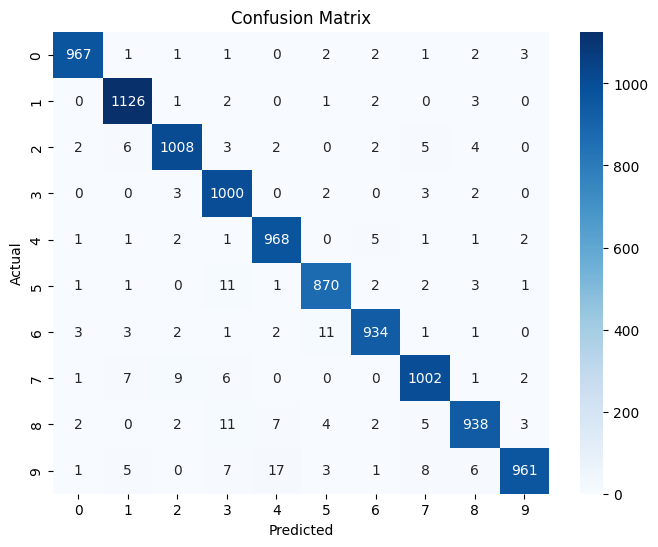

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
